# MULTI CLASS CLASSIFICTION

In [5]:
import numpy as np
from sklearn.datasets import load_iris


In [6]:
iris = load_iris()

In [7]:
x = iris.data

In [8]:
y = iris.target

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.2,random_state=3)

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
log = LogisticRegression(multi_class = "multinomial",solver = "saga",max_iter=1000)

In [13]:
log.fit(xtrain,ytrain)

E:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
test = xtest[0]

In [15]:
test

array([4.6, 3.2, 1.4, 0.2])

In [16]:
#we need to reshape this sample

In [18]:
test = xtest[0].reshape(1,-1)

In [19]:
test.ndim

2

In [20]:
#displaying the probablity for each class
log.predict_proba(test)

array([[9.66211819e-01, 3.37878553e-02, 3.25767906e-07]])

In [23]:
log.predict_proba(test).max()

0.9662118189622878

In [24]:
#returning the index of the value having max probablity
log.predict_proba(test).argmax()

0

In [25]:
# in the multiclass classification we get a probablity for each class and out of that max probablity is picked as the label

In [26]:
pred = log.predict(xtest)

In [28]:
log.predict(test)

array([0])

In [29]:
pred

array([0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 2, 0, 1, 2, 2, 0, 2, 2,
       2, 1, 0, 2, 2, 1, 1, 1])

In [30]:
#calculating the accuracy score
log.score(xtest,ytest)

1.0

# WORKING ON HANDWRITTEN DIGITS DATASET

In [31]:
# here we have images for the digits
# so each image is of 8*8 ie 8 rows and 8 cols
# there is total of 10 classes 
# total samples  = 1797
# no of dimensions = 64

In [33]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

In [34]:
d = load_digits()

In [35]:
print(d.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [36]:
d.images.shape

(1797, 8, 8)

In [37]:
d.images.ndim

3

In [38]:
x = d.images
y = d.target

In [39]:
d.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

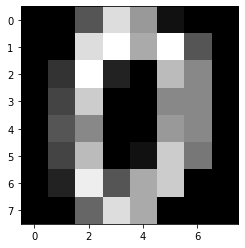

In [40]:
plt.imshow(x[0],cmap="gray")
plt.show()

In [41]:
y[0]

0

In [42]:
x.ndim

3

In [43]:
x1 = x.reshape(x.shape[0],-1)

In [44]:
x1.shape

(1797, 64)

In [45]:
x1.ndim

2

In [46]:
xtrain,xtest,ytrain,ytest = train_test_split(x1,y,test_size=.2,random_state =12)

In [48]:
log = LogisticRegression(multi_class = "multinomial",solver = "saga",max_iter = 100000)

In [49]:
log.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
t = xtest[100].reshape(1,-1)

In [52]:
t.shape

(1, 64)

In [53]:
log.predict(t)

array([8])

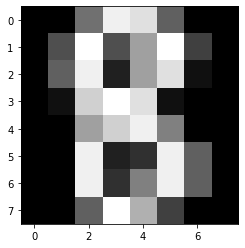

In [55]:
plt.imshow(t.reshape(8,8),cmap="gray")

In [56]:
ytest[100]

8

In [57]:
pred = log.predict(xtest)

In [58]:
log.score(xtest,ytest)

0.9666666666666667

In [59]:
#displaying the index for the misclassified samples
np.where(ytest!=pred)

(array([ 56,  66,  82, 135, 156, 161, 169, 212, 213, 313, 315, 356],
       dtype=int64),)

In [60]:
pred[66]

2

In [61]:
ytest[66]

8